In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import re


 Power dependence measurements.
 Read data

In [2]:
path = 'D:\\Projects (Miller)\\Ni-dmit\\ta-data-from-simon\\2019-06-20-NiDmit_Nice_Data\\Sample1_166Hz_20ps'
filename = 'CompiledScan_1.scan'
with open(path + '\\' + filename, 'r') as f:
    fcontent = f.read()

# Trim starting '[' and ending ']'
fcontent = fcontent[1:-1]

# Remove all " (around NaN)
fcontent = re.sub('(\")', '', fcontent)

# Define data dict
data = {'wave': None, 'time': None, 'abs': None, 'spec_bkg': None}

# Find and split at '[[' and ']]'
it1 = re.finditer('(\[{2})', fcontent)
it2 = re.finditer('(\]{2})', fcontent)
for m1, m2, k in zip(it1, it2, data.keys()):
    i = (m1.span())[1]
    j = (m2.span())[1] - 2
    data[k] = fcontent[i:j]

fcontent = None
del fcontent


In [3]:

# Remove extra '[' and ']'
data['abs'] = re.sub('(\[)|(\])', '', data['abs'])

# Split and convert string to array
for k in data.keys():
    i = data[k].split(',')
    data[k] = np.asarray(i)

for k in data.keys():
    print(f'{k} -> {data[k].shape}')

# Convert 'NaN' strings to values
data['abs'][(data['abs'][:] == 'NaN')] = np.nan

# Convert strings to floats
for k in data.keys():
    #print(f'{k} -> {data[k].shape}')
    data[k] = np.asarray([float(i) for i in data[k]])

# Reshape absorbance data
data['abs'] = np.reshape(data['abs'], (data['time'].shape[0], data['wave'].shape[0]))

# Change to picoseconds
data['time'] = np.divide(data['time'], 1000)


wave -> (2068,)
time -> (241,)
abs -> (498388,)
spec_bkg -> (2068,)


Text(0.5, 1.0, 'TA Data')

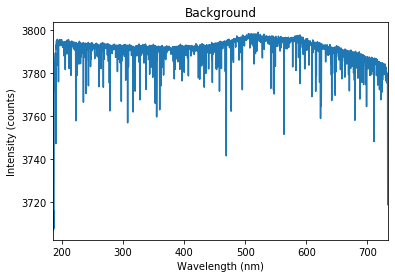

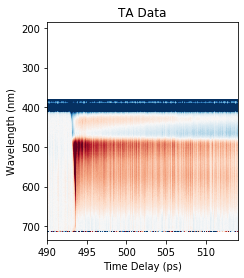

In [4]:

fig, ax = plt.subplots(1, 1)
ax.plot(data['wave'], data['spec_bkg'])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (counts)')
ax.set_xlim(data['wave'][0], data['wave'][-1])
ax.set_title('Background')

norm = colors.BoundaryNorm(boundaries = np.linspace(-15, 15, 256), ncolors = 256)

fig, ax = plt.subplots(1, 1)
# ax.imshow(1000*np.transpose(data['abs']), aspect = 0.05, extent = [data['time'][0], data['time'][-1], data['wave'][-1], data['wave'][0]], cmap = 'RdBu_r', norm = norm, interpolation = None)
ax.imshow(1000*np.transpose(data['abs']), aspect = 0.05, extent = [data['time'][0], data['time'][-1], data['wave'][-1], data['wave'][0]], cmap = 'RdBu_r', vmin = -15, vmax = 15, interpolation = None)
ax.set_xlabel('Time Delay (ps)')
ax.set_ylabel('Wavelength (nm)')
ax.set_title('TA Data')

# i, j = np.meshgrid(data['time'], data['wave'])
# fig, ax = plt.subplots(1, 1)
# ax.pcolormesh(i, j, np.transpose(data['abs']), cmap = 'RdBu', norm = norm)


 Define and import a function to deal with parsing `*.scan`.

In [5]:
from ni_dmit import parse_scan

# Import all power dependence data.
power_path = 'D:\\Projects (Miller)\\Ni-dmit\\ta-data-from-simon\\2019-06-19-nIdMIT_400nmPump\\Sample2_500Hz\\Power Dependence'
power_val = np.arange(200, 2000, 200)
power_val = np.append(power_val, [2000, 2400])
power_data = []
for i in range(power_val.shape[0]):
    filename = str(power_val[i]) + 'nJ.scan'
    power_data.append(parse_scan(full_path = (power_path + '\\' + filename)))


D:\Projects (Miller)\Ni-dmit\ta-data-from-simon\2019-06-19-nIdMIT_400nmPump\Sample2_500Hz\Power Dependence\200nJ.scan
wave -> (2068,)
time -> (21,)
abs -> (43428,)
spec_bkg -> (2068,)
D:\Projects (Miller)\Ni-dmit\ta-data-from-simon\2019-06-19-nIdMIT_400nmPump\Sample2_500Hz\Power Dependence\400nJ.scan
wave -> (2068,)
time -> (21,)
abs -> (43428,)
spec_bkg -> (2068,)
D:\Projects (Miller)\Ni-dmit\ta-data-from-simon\2019-06-19-nIdMIT_400nmPump\Sample2_500Hz\Power Dependence\600nJ.scan
wave -> (2068,)
time -> (21,)
abs -> (43428,)
spec_bkg -> (2068,)
D:\Projects (Miller)\Ni-dmit\ta-data-from-simon\2019-06-19-nIdMIT_400nmPump\Sample2_500Hz\Power Dependence\800nJ.scan
wave -> (2068,)
time -> (21,)
abs -> (43428,)
spec_bkg -> (2068,)
D:\Projects (Miller)\Ni-dmit\ta-data-from-simon\2019-06-19-nIdMIT_400nmPump\Sample2_500Hz\Power Dependence\1000nJ.scan
wave -> (2068,)
time -> (21,)
abs -> (43428,)
spec_bkg -> (2068,)
D:\Projects (Miller)\Ni-dmit\ta-data-from-simon\2019-06-19-nIdMIT_400nmPump\Sam

 Plot the data

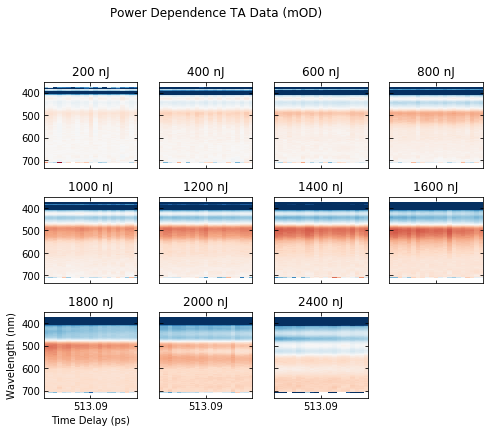

In [6]:
nrows = 4
ncols = 3
lr_margin = 0.1
ud_margin = 0.1
spacing = 0.05
width = (1 - 2*lr_margin - ncols*spacing)/ncols
height = (1 - 2*ud_margin - nrows*spacing)/nrows

fig = plt.figure(figsize = [2*ncols, 2*nrows])
fig.suptitle('Power Dependence TA Data (mOD)')
ax = np.empty((nrows, ncols), dtype = 'O')
for j in range(ncols):
    for i in range(nrows):

        # (i, j) index to linear index, Fortran/col-major style 
        k = np.ravel_multi_index([i, j], ax.shape, order = 'F')

        if k < power_val.shape[0]:

            # Plot
            ax[i, j] = plt.axes([lr_margin + i*(width + spacing), ud_margin + (ncols - j)*(height + spacing), width, height])

            # Data
            data = power_data[k]
            w = (data['wave'] >= 350)
            ax[i, j].imshow(1000*data['abs'][w, :], aspect = 'auto', extent = [data['time'][0], data['time'][-1], data['wave'][-1], 350], cmap = 'RdBu_r', vmin = -15, vmax = 15, interpolation = None)

            # Ticks
            ax[i, j].tick_params(which = 'both', direction = 'in', top = True, right = True)
            ax[i, j].ticklabel_format(style = 'plain')
            ax[i, j].set_xticks([513.09])
            if i != 0:
                ax[i, j].tick_params(labelleft = False)
            if j != (ncols - 1):
                ax[i, j].tick_params(labelbottom = False)

            # Titles
            ax[i, j].set_title(f'{power_val[k]} nJ')

ax[0, -1].set_xlabel('Time Delay (ps)')
ax[0, -1].set_ylabel('Wavelength (nm)')

data = None
del data


 Trim out nan regions (outside of 425-700 nm)

In [7]:
i = np.isnan(power_data[0]['abs'][:, 0])
j = (power_data[0]['wave'] < 425) | (power_data[0]['wave'] > 700)
k = np.where(i | j)
for i in range(power_val.shape[0]):
    power_data[i]['abs'] = np.delete(power_data[i]['abs'], k, 0)
    power_data[i]['wave'] = np.delete(power_data[i]['wave'], k, 0)


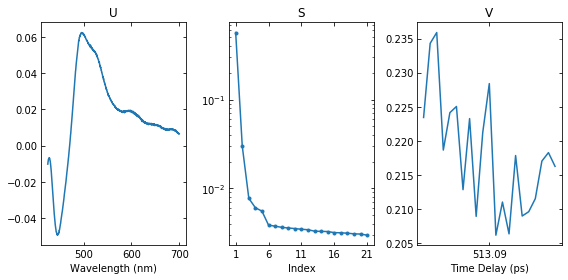

In [8]:
# Do SVD on each dataset.
i = 5
data = power_data[i]['abs']
U, S, Vh = np.linalg.svd(data, full_matrices = False)

fig, ax = plt.subplots(1, 3, figsize = [8, 4])
ax[0].plot(power_data[0]['wave'], U[:, 0])
ax[0].set_title('U')
ax[0].set_xlabel('Wavelength (nm)')
ax[0].tick_params(which = 'both', direction = 'in', top = True, right = True)
#
ax[1].plot(np.arange(1, S.shape[0] + 1, 1), S, marker = '.')
ax[1].tick_params(which = 'both', direction = 'in', top = True, right = True)
ax[1].set_yscale('log')
ax[1].set_xticks(range(1, S.shape[0] + 1, 5))
ax[1].set_xlabel('Index')
ax[1].set_title('S')
#
ax[2].plot(power_data[0]['time'], Vh[0, :])
ax[2].set_title('V')
ax[2].set_xlabel('Time Delay (ps)')
ax[2].set_xticks([513.09])
ax[2].tick_params(which = 'both', direction = 'in', top = True, right = True)
plt.tight_layout()


In [9]:

power_u = np.empty([U.shape[0], power_val.shape[0]])
power_s = np.empty([power_val.shape[0], 1])
power_vh = np.empty([power_val.shape[0], Vh.shape[1], ])
for i in range(power_val.shape[0]):
    data = power_data[i]['abs']
    U, S, Vh = np.linalg.svd(data, full_matrices = False)

    power_s[i] = S[0]

    if Vh[0, :].mean() < 0:
        power_u[:, i] = U[:, 0]
        power_vh[i, :] = Vh[0, :]
    else:
        power_u[:, i] = -U[:, 0]
        power_vh[i, :] = -Vh[0, :]


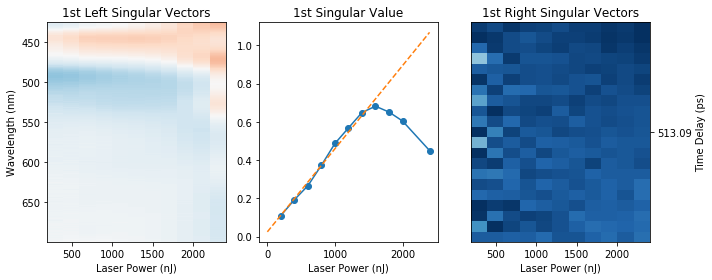

In [10]:

fig, ax = plt.subplots(1, 3, figsize = [10, 4])
ax[0].imshow(power_u, aspect = 'auto', extent = [power_val[0], power_val[-1], power_data[0]['wave'][-1], power_data[0]['wave'][0]], vmin = -0.2, vmax = 0.2, cmap = 'RdBu_r')
ax[0].set_ylabel('Wavelength (nm)')
ax[0].set_xlabel('Laser Power (nJ)')
ax[0].set_title('1st Left Singular Vectors')
#
ax[1].plot(power_val, power_s, marker = 'o')
ax[1].set_xlabel('Laser Power (nJ)')
ax[1].set_title('1st Singular Value')
power_s_fit = np.polyfit(power_val[power_val < 1800], power_s[power_val < 1800], 1)
ax[1].plot(np.insert(power_val, 0, 0), np.polyval(power_s_fit, np.insert(power_val, 0, 0)), linestyle = '--')
#
ax[2].imshow(power_vh.T, aspect = 'auto', extent = [power_val[0], power_val[-1], power_data[0]['time'][-1], power_data[0]['time'][0]], vmin = -0.25, vmax = 0.25, cmap = 'RdBu_r')
ax[2].set_yticks([513.09])
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position('right')
ax[2].set_ylabel('Time Delay (ps)')
ax[2].set_xlabel('Laser Power (nJ)')
ax[2].set_title('1st Right Singular Vectors')
#
plt.tight_layout()
